# Habitability on Exo-Planets: Traditional Model and Machine Learning

### Abstract

This study examines planet habitability using both a conventional model and machine learning. The classic approach alludes to the straightforward model we've constructed to determine if a planet is located in a habitable zone. The planets' habitability may be predicted using a machine learning model that is more reliable, considers more factors, and examines their relationships. The alignment and discrepancy between actual and expected values are described by the confusion matrix for each model.

In [1]:
# import the libraries to use in the models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# read and show the data
data = pd.read_csv('./exoplanet_prediction_data_2021.csv')
display(data)

,Planet_Name,Planet_Mass,Planet_Period,Planet_Semi_Major_Axis,Solar_Distance,Solar_Mass,Solar_Radius,Solar_Temperature,Planet_Distance,Planet_Flux,Planet_Equilibrium_Temperature,Solar_Luminosity,Planet_HabitableZone_Opt,Planet_HabitableZone_Con,Planet_Habitable,Planet_Earth_Similarity_Index
0,11 Com b,6165.86330,326.030000,1.29000,93.37,2.70,19.000000,4742.0,1.324418,101.011410,799.44963,163.546800,0,0,0,0.083813
1,11 UMi b,4684.78480,516.219970,1.53000,125.72,2.78,29.790000,4213.0,1.534896,107.351180,819.07569,250.492940,0,0,0,0.082414
2,14 And b,1525.57440,185.840000,0.83000,75.59,2.20,11.000000,4813.0,0.830000,84.446427,772.30746,58.175144,0,0,0,0.081917
3,14 Her b,1481.07850,1773.400000,2.93000,17.94,0.90,0.930000,5338.0,3.130558,0.078887,131.38424,0.629171,0,0,0,0.145241
4,16 Cyg B b,565.73385,798.500000,1.66000,21.15,1.08,1.130000,5750.0,2.043792,0.618972,202.22783,1.250596,1,1,0,0.368627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,K2-296 b,NaN,28.165600,0.13456,160.00,0.41,0.374241,3772.0,0.134560,1.402963,277.27227,0.025403,1,0,2,0.755038
4044,K2-296 c,NaN,7.906961,0.05769,160.00,0.41,0.374241,3772.0,0.057690,7.632679,423.46173,0.025403,0,0,0,0.363831
4045,GJ 1061 b,1.38000,3.204000,0.02100,3.69,0.12,0.156000,2953.0,0.021000,3.759699,354.75879,0.001658,0,0,0,0.588562
4046,GJ 1061 c,1.75000,6.689000,0.03500,3.69,0.12,0.156000,2953.0,0.035000,1.353492,274.79498,0.001658,1,0,1,0.879042


In [3]:
# see the data types
display(data.dtypes)

Planet_Name                        object
Planet_Mass                       float64
Planet_Period                     float64
Planet_Semi_Major_Axis            float64
Solar_Distance                    float64
Solar_Mass                        float64
Solar_Radius                      float64
Solar_Temperature                 float64
Planet_Distance                   float64
Planet_Flux                       float64
Planet_Equilibrium_Temperature    float64
Solar_Luminosity                  float64
Planet_HabitableZone_Opt            int64
Planet_HabitableZone_Con            int64
Planet_Habitable                    int64
Planet_Earth_Similarity_Index     float64
dtype: object

In [4]:
# check if there are any null values
display(data.isna().any())

Planet_Name                       False
Planet_Mass                        True
Planet_Period                      True
Planet_Semi_Major_Axis             True
Solar_Distance                     True
Solar_Mass                         True
Solar_Radius                       True
Solar_Temperature                  True
Planet_Distance                    True
Planet_Flux                        True
Planet_Equilibrium_Temperature     True
Solar_Luminosity                   True
Planet_HabitableZone_Opt          False
Planet_HabitableZone_Con          False
Planet_Habitable                  False
Planet_Earth_Similarity_Index      True
dtype: bool

In [5]:
# drop the columns not used in the model
data.drop(columns=['Planet_Name', 'Planet_Habitable', 'Planet_HabitableZone_Con'], inplace=True)
# remove the missing values
data.dropna(inplace=True)

In [6]:
# data shape and the filtered data
print(data.shape)
display(data)

(1001, 13)


,Planet_Mass,Planet_Period,Planet_Semi_Major_Axis,Solar_Distance,Solar_Mass,Solar_Radius,Solar_Temperature,Planet_Distance,Planet_Flux,Planet_Equilibrium_Temperature,Solar_Luminosity,Planet_HabitableZone_Opt,Planet_Earth_Similarity_Index
0,6165.863300,326.03000,1.290,93.37,2.70,19.000,4742.0,1.324418,101.011410,799.44963,163.546800,0,0.083813
1,4684.784800,516.21997,1.530,125.72,2.78,29.790,4213.0,1.534896,107.351180,819.07569,250.492940,0,0.082414
2,1525.574400,185.84000,0.830,75.59,2.20,11.000,4813.0,0.830000,84.446427,772.30746,58.175144,0,0.081917
3,1481.078500,1773.40000,2.930,17.94,0.90,0.930,5338.0,3.130558,0.078887,131.38424,0.629171,0,0.145241
4,565.733850,798.50000,1.660,21.15,1.08,1.130,5750.0,2.043792,0.618972,202.22783,1.250596,1,0.368627
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4038,1.830689,49.41000,0.243,3.60,0.78,0.793,5344.0,0.249427,7.996323,424.09232,0.459516,0,0.446574
4039,6547.256900,305.50000,1.170,112.64,2.30,26.800,4388.0,1.170562,174.365980,925.61857,238.574880,0,0.079589
4045,1.380000,3.20400,0.021,3.69,0.12,0.156,2953.0,0.021000,3.759699,354.75879,0.001658,0,0.588562
4046,1.750000,6.68900,0.035,3.69,0.12,0.156,2953.0,0.035000,1.353492,274.79498,0.001658,1,0.879042


In [7]:
# divide the data into features and target set
features = data.drop(columns=['Planet_HabitableZone_Opt'])
target = data.Planet_HabitableZone_Opt

In [8]:
# see the number of types in the target set
print(target.unique())

[0 1]


In [9]:
# see if there are any missing values in the data set.
data.isnull().sum()

Planet_Mass                       0
Planet_Period                     0
Planet_Semi_Major_Axis            0
Solar_Distance                    0
Solar_Mass                        0
Solar_Radius                      0
Solar_Temperature                 0
Planet_Distance                   0
Planet_Flux                       0
Planet_Equilibrium_Temperature    0
Solar_Luminosity                  0
Planet_HabitableZone_Opt          0
Planet_Earth_Similarity_Index     0
dtype: int64

(0.0, 2600.0, 0.0, 4.0)

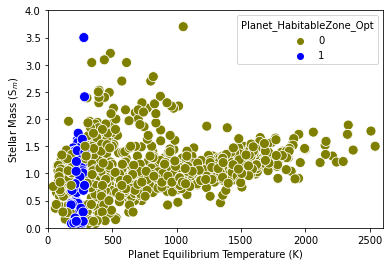

In [10]:
# equilibrium temperature is similar to that of earth's (273-373 K)
x = sns.scatterplot(data=data, y='Solar_Mass', x="Planet_Equilibrium_Temperature",hue='Planet_HabitableZone_Opt', s=100, palette=['olive','blue'])
x.set(xlabel="Planet Equilibrium Temperature (K)", ylabel="Stellar Mass (S$_m$)")
x.axis([0,2600,0,4])

(-1.0, 90.0, 0.0, 1.0)

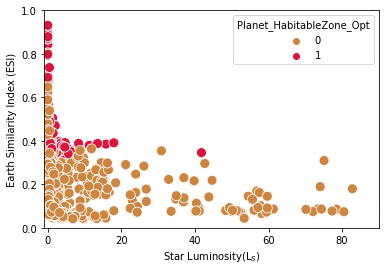

In [11]:
# for larger luminosity, less ESI & for smaller luminosity, more ESI (inverse)
x = sns.scatterplot(data=data, x='Solar_Luminosity', y="Planet_Earth_Similarity_Index",hue='Planet_HabitableZone_Opt', s=100, palette=['peru','crimson'])
x.set(xlabel="Star Luminosity(L$_S$)", ylabel="Earth Similarity Index (ESI)")
x.axis([-1,90,0,1])

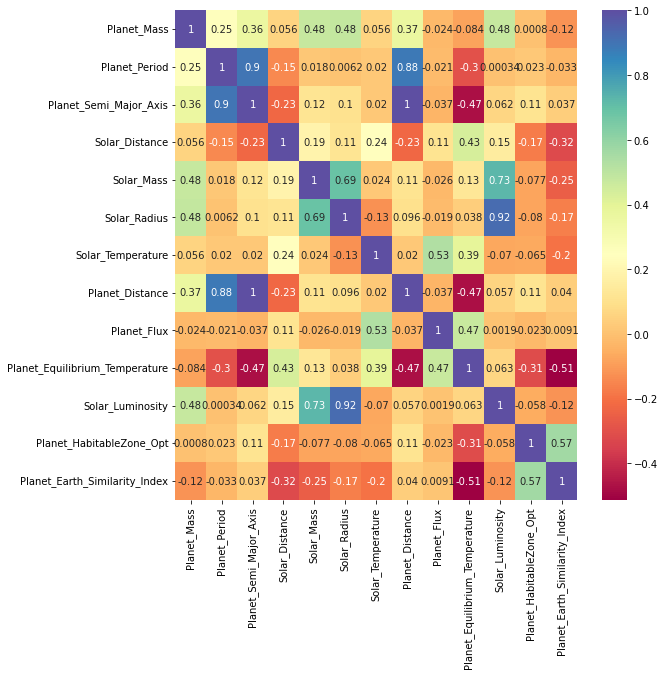

In [12]:
# visualize the correlation between the parameters
fig, ax = plt.subplots(figsize=(9,9))  
sns.heatmap(data.corr(), annot = True,cmap="Spectral");

# MACHINE LEARNING MODELS

In [13]:
# visualization function for the confusion matrix
def conf_matrix(x):
    plt.figure(dpi=100)
    sns.heatmap(x, cmap=plt.cm.cividis, annot=True, square=True,fmt='d',
               xticklabels=['Not Habitable', 'Habitable'],
               yticklabels=['Not Habitable', 'Habitable'])

    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')

In [14]:
# divide the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1, stratify = target)
# view the split data set
print('X train', X_train.shape)
print('y train', y_train.shape)
print('X test', X_test.shape)
print('y test', y_test.shape)

X train (700, 12)
y train (700,)
X test (301, 12)
y test (301,)


In [15]:
# standardize by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [16]:
# see the probability of occuring of the target values
target.value_counts(normalize= True)

0    0.89011
1    0.10989
Name: Planet_HabitableZone_Opt, dtype: float64

### 1) Logistic Regression Model

In [17]:
# logitistic regression for class prediction
# create the model instance
lr_model = LogisticRegression(C=100, max_iter=200, class_weight='balanced')
# fit the model for training data
lr_model.fit(X_train, y_train)
# the accuracy of the model
lr_model.score(X_test, y_test)

0.946843853820598

In [18]:
# check the model's stength using cross validation score
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=10)
print(np.mean(lr_scores))

0.93


In [19]:
# impact of data in deciding the class
data_coef = pd.DataFrame(lr_model.coef_, columns=X_train.columns)
display(data_coef)

,Planet_Mass,Planet_Period,Planet_Semi_Major_Axis,Solar_Distance,Solar_Mass,Solar_Radius,Solar_Temperature,Planet_Distance,Planet_Flux,Planet_Equilibrium_Temperature,Solar_Luminosity,Planet_Earth_Similarity_Index
0,-0.182651,-5.775384,4.970362,-0.039093,2.2209,8.863362,1.815961,-4.399293,-0.047109,-30.171613,-11.639986,4.684842


In [20]:
# predictions by the model for the test data set
lr_predictions = lr_model.predict(X_test)
display(lr_predictions)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [21]:
# compare the predicted values with actual values
compare_df = pd.DataFrame({'actual': y_test, 'predicted': lr_predictions})
compare_df = compare_df.reset_index(drop = True)
display(compare_df)

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
296,0,0
297,0,0
298,0,0
299,0,0


,0,1
0,253,15
1,1,32


Text(0.5, 1.0, 'Logistic Regression Model Confusion Matrix')

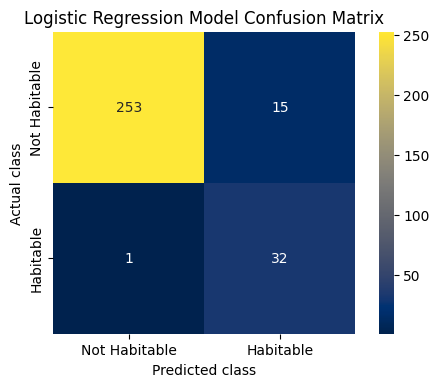

In [22]:
display(pd.DataFrame(confusion_matrix(y_test, lr_predictions)))

conf_lr = confusion_matrix(y_test, lr_predictions)

conf_matrix(conf_lr)
plt.title('Logistic Regression Model Confusion Matrix')

### 2) Random Forest Classifier Model

In [23]:
# random forest classifier for class prediction
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)
y_pred=rfc_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9867109634551495

In [24]:
# check the model's stength using cross validation score
rfc_scores = cross_val_score(rfc_model, X_train, y_train, cv=10)
print(np.mean(rfc_scores))

0.9828571428571429


In [25]:
# predictions by the model for the test data set
rfc_predictions = rfc_model.predict(X_test)
display(rfc_predictions)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [26]:
# compare the predicted values with actual values
rfc_compare_df = pd.DataFrame({'actual': y_test, 'predicted': rfc_predictions})
rfc_compare_df = rfc_compare_df.reset_index(drop = True)
display(rfc_compare_df)

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
296,0,0
297,0,0
298,0,0
299,0,0


,0,1
0,266,2
1,2,31


Text(0.5, 1.0, 'Random Forest Classifier Model Confusion Matrix')

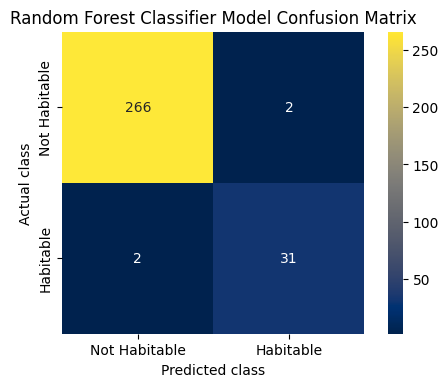

In [27]:
display(pd.DataFrame(confusion_matrix(y_test, rfc_predictions)))

rfc_conf_lr = confusion_matrix(y_test, rfc_predictions)

conf_matrix(rfc_conf_lr)
plt.title('Random Forest Classifier Model Confusion Matrix')

## Traditional Models

While utilising the conventional model, we have taken the luxury of assuming an environment similar to Earth, resulting in an albedo and effective greenhouse temperature that are almost identical to Earth's. Though it's possible that this isn't the best strategy, we're eager to learn more about the planets' albedo and the condition of their gases so that our standard model can be more accurate.

### 1) MODEL 1

In [28]:
def model_one_upper(L_star): # With Greenhouse Effect
    s=5.67*(10**(-8)) #Stefan boltzmann constant 
    L=3.84*10**26*L_star #Luminosity or power radiated by the star
    d=149.6*10**9 #Radius of the orbit in meters multiplied by radius of star in AU 
    b=L/(4*np.pi*(d**2)) #Solar constant or apparent brightness
    b_eff=(1-0.28)*b #The effective apparent brightness that is absorbed 
    g_1=(b_eff/(4*s*(273-32)**4))**0.5 #water at 0 degrees celsius
    g_2=(b_eff/(4*s*(373-32)**4))**0.5 #water at 100 degrees celsius (both these assume that the heat is b_eff)
    return (np.round(g_1,2))

def model_one_lower(L_star): # With Greenhouse Effect
    s=5.67*(10**(-8)) #Stefan boltzmann constant 
    L=3.84*10**26*L_star #Luminosity or power radiated by the star
    d=149.6*10**9 #Radius of the orbit in meters multiplied by radius of star in AU 
    b=L/(4*np.pi*(d**2)) #Solar constant or apparent brightness
    b_eff=(1-0.28)*b #The effective apparent brightness that is absorbed 
    g_1=(b_eff/(4*s*(273-28)**4))**0.5 #water at 0 degrees celsius
    g_2=(b_eff/(4*s*(373-28)**4))**0.5 #water at 100 degrees celsius (both these assume that the heat is b_eff)
    return (np.round(g_2,2))

In [29]:
# check the habitability status and create an array
L_star=(np.array(data.Solar_Luminosity))
d=(np.array(data.Planet_Distance))
lb=np.array(model_one_lower(L_star))
ub=np.array(model_one_upper(L_star))
hab=[]
for i in range(0,len(d)):
    if ub[i]>=d[i]>=lb[i]:
        hab.append(1)
    else:
        hab.append(0)
print(hab)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 

Text(0.5, 1.0, 'Traditional Model 1 Confusion Matrix')

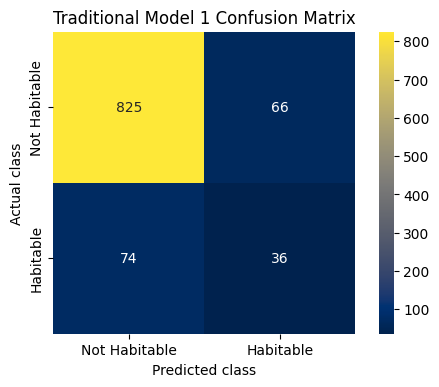

In [30]:
# the confusion matrix
conf_trad = confusion_matrix(target,hab)
conf_matrix(conf_trad)
plt.title('Traditional Model 1 Confusion Matrix')

### 2) MODEL 2

In [31]:
def habitable_zone_GH_down(L_star,albedo,w): # With Greenhouse Effect
    s=5.67*(10**(-8)) # Stefan boltzmann constant 
    L=3.84*10**26*L_star # Luminosity or power radiated by the star
    d=149.6*10**9 # Radius of the orbit in meters multiplied by radius of star in AU 
    b=L/(4*np.pi*(d**2)) # Solar constant or apparent brightness
    b_eff=(1-albedo)*b # The effective apparent brightness that is absorbed 
    g_1=(b_eff/(4*s*(273-w)**4))**0.5 # water at 0 degrees celsius
    g_2=(b_eff/(4*s*(373-w)**4))**0.5 # water at 100 degrees celsius (both these assume that the heat is b_eff)
    return g_2 # gives CHZ in astronomical units upper bound g_2) #gives CHZ lower bound

def habitable_zone_GH_up(L_star,albedo,w): # With Greenhouse Effect
    s=5.67*(10**(-8)) # Stefan boltzmann constant 
    L=3.84*10**26*L_star # Luminosity or power radiated by the star
    d=149.6*10**9 # Radius of the orbit in meters multiplied by radius of star in AU 
    b=L/(4*np.pi*(d**2)) # Solar constant or apparent brightness
    b_eff=(1-albedo)*b # The effective apparent brightness that is absorbed 
    g_1=(b_eff/(4*s*(273-w)**4))**0.5 # water at 0 degrees celsius
    g_2=(b_eff/(4*s*(373-w)**4))**0.5 # water at 100 degrees celsius (both these assume that the heat is b_eff)
    return g_1 # gives CHZ in astronomical units upper bound g_2) #gives CHZ lower bound

A=(np.array(data.Solar_Luminosity))
UB=[]
LB=[]
for i in range(0,len(A)):
        b=(habitable_zone_GH_down(A[i],0.3,0))
        c=(habitable_zone_GH_down(A[i],0,32))
        q=(habitable_zone_GH_down(A[i],0.3,100))
        e=(habitable_zone_GH_down(A[i],0.3,32))
        O=np.array([b,c,q,e])
        B=np.array(np.round((min(O)),2))
        r=(habitable_zone_GH_up(A[i],0.3,0))
        s=(habitable_zone_GH_up(A[i],0,32))
        t=(habitable_zone_GH_up(A[i],0.3,100))
        u=(habitable_zone_GH_up(A[i],0.3,32))
        v=np.array([r,s,t,u])
        D=np.round((max(v)),2)
        I=([B,D])
        I_min=(min(I))
        LB.append(I_min)
        I_max=(max(I))
        UB.append(I_max)

In [32]:
L_star=(np.array(data.Solar_Luminosity))
d=(np.array(data.Planet_Distance))
hf=[]
for i in range(0,len(d)):
    if UB[i]>=d[i]>=LB[i]:
        hf.append(1)
    else:
        hf.append(0)
print(hf)

[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 

Text(0.5, 1.0, 'Traditional Model 2 Confusion Matrix')

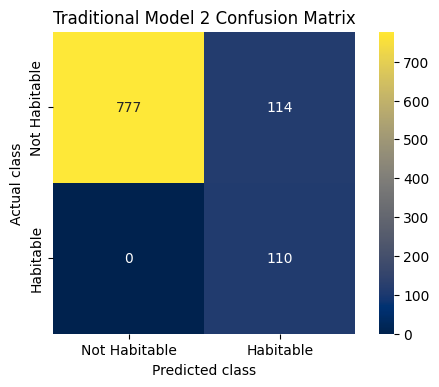

In [33]:
conf_trad = confusion_matrix(target,hf)
conf_matrix(conf_trad)
plt.title('Traditional Model 2 Confusion Matrix')

### Accuracy of each model

In [34]:
# create function to find accuracy
def accuracy(tn,fp,fn,tp):
    acc = (tp+tn)/(tp+fp+tn+fn)
    return acc

In [35]:
# list of models
models_lst=["Logistic Regression","Random Forest","Traditional 1","Traditional 2"]
# list of accuracies of models
accuracy_lst=[]

In [36]:
# Linear Regression Model
print(accuracy(253,15,1,32))
accuracy_lst.append(accuracy(253,15,1,32)*100)

0.946843853820598


In [37]:
# random forest classifier
print(accuracy(265,3,1,32))
accuracy_lst.append(accuracy(265,3,1,32)*100)

0.9867109634551495


In [38]:
# Traditional Model 1
print(accuracy(825,66,74,36))
accuracy_lst.append(accuracy(825,66,74,36)*100)

0.8601398601398601


In [39]:
# Traditional Model 2
print(accuracy(777,114,0,110))
accuracy_lst.append(accuracy(777,114,0,110)*100)

0.8861138861138861


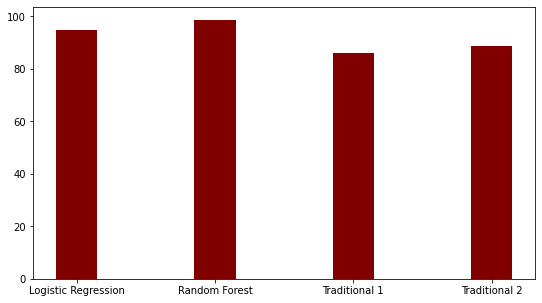

In [40]:
# bar graph of models with respect to their accuracy
plt.figure(figsize=(9,5))
plt.bar(models_lst,accuracy_lst,align="center",width=0.3,color="maroon")
plt.show()

# Result

The Random Forest Classifier machine learning model has the highest accuracy when compared to the other models. The traditional model 2 is less accurate than the traditional model 1, and the Logistic Regression model is more accurate than both of them.